# Lab Imbalanced data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset and explore the variables.

In [2]:
churn=pd.read_csv('customer_churn.csv')
display(churn.head())
churn['Churn'].value_counts(dropna=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5174
Yes    1869
Name: Churn, dtype: int64

In [3]:
churn['Churn'] = churn['Churn'].replace({'Yes': 1, 'No': 0})

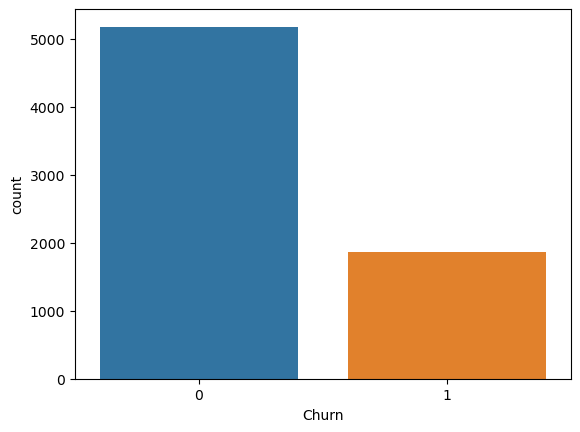

In [4]:
sns.countplot(x='Churn', data=churn);
plt.show()

In [5]:
count_classes = churn['Churn'].value_counts()
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


In [6]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

2. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')


In [7]:
from sklearn.model_selection import train_test_split

X = churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]  
y = churn['Churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

3. Build the logistic regression model.

In [8]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler() 
transformer.fit(X_train) 

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
6607,-1.282882,-0.436091,-1.310046
2598,-1.037857,-0.436091,0.344832
2345,-1.160369,-0.436091,-1.484331
4093,-0.139429,-0.436091,0.373049
693,-1.201207,-0.436091,0.343172


In [9]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.80


4. Evaluate the model.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.80
The precision in the TEST set is: 0.70
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.55
The Kappa in the TEST set is: 0.43


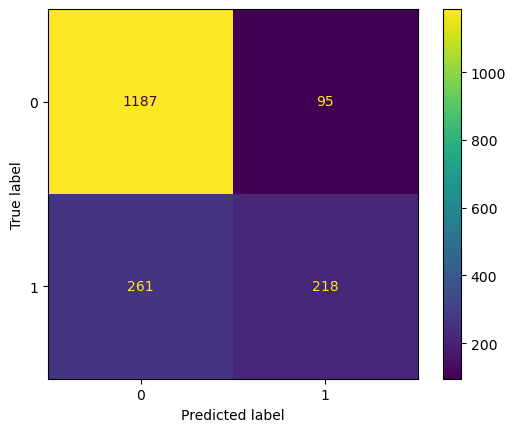

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

5. Even a simple model will give us more than 70% accuracy. Why?

Because we apply preprocessing to data as feature scaling, remove missing values, or transform Y categorical variable into numerical.

6. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
sm = SMOTE(random_state=42,k_neighbors=5)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [15]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7784, 3)


In [16]:
y_train_SMOTE.value_counts()

1    3892
0    3892
Name: Churn, dtype: int64

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.74
The precision in the TEST set is: 0.52
The recall in the TEST set is: 0.76
The F1 in the TEST set is: 0.62
The Kappa in the TEST set is: 0.43


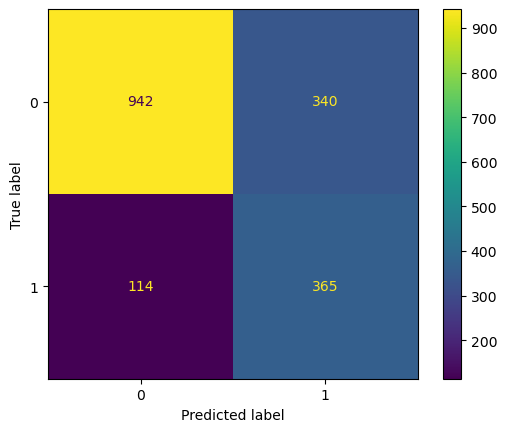

In [18]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

The accuracy and precision is lower that the previous model. But, improves in recall an F1. Kappa is the same for both models.